In [9]:
#import necessary libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
#Load dataset into pandas dataframe.
df=pd.read_excel("data/ECOMM DATA.xlsx")

df.head()   

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [11]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [13]:
# 1. Total sales
total_sales = df['Sales'].sum()
print(f"Total sales : {total_sales}")


Total sales : 12642501.909880001


In [15]:
print(type(df['Order Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [23]:
order_sales_sum = df.groupby('Order Date')['Sales'].sum().reset_index()
order_sales_sum.head()

,Order Date,Sales
0,2011-01-01,808.56300
1,2011-01-02,314.22000
2,2011-01-03,4503.53720
3,2011-01-04,2808.87024
4,2011-01-05,3662.31000


In [27]:
print(type(order_sales_sum["Sales"]))

<class 'numpy.float64'>


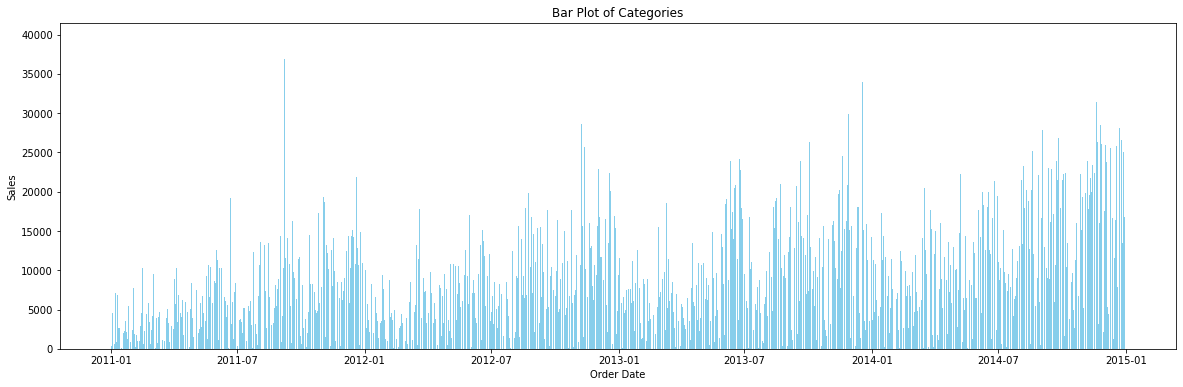

In [33]:
sales_timeline_fig = plt

sales_timeline_fig.figure(figsize=(20, 6))
sales_timeline_fig.bar(order_sales_sum['Order Date'], order_sales_sum['Sales'], color='skyblue')  # 'color' sets the bar color
sales_timeline_fig.title('Bar Plot of Categories')
sales_timeline_fig.xlabel('Order Date')
sales_timeline_fig.ylabel('Sales')
sales_timeline_fig.show()

Organizing by grouping into year and month

In [36]:
order_sales_sum['Year-Month'] = order_sales_sum['Order Date'].dt.to_period('M').astype(str)

# Group by 'Year-Month' and sum 'Sales'
grouped_sales = order_sales_sum.groupby('Year-Month')['Sales'].sum().reset_index()

# Sort by 'Year-Month'
grouped_sales = grouped_sales.sort_values(by='Year-Month')

In [37]:
grouped_sales.head()

,Year-Month,Sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


Visualize grouped sales

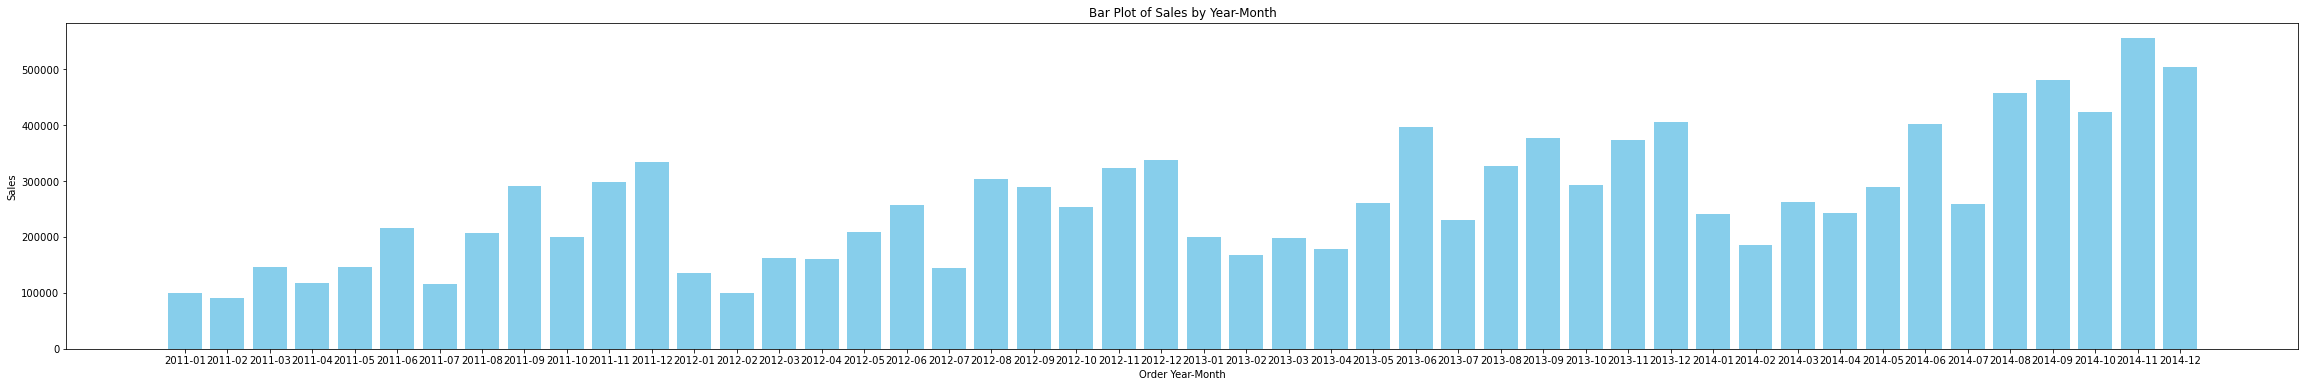

In [40]:
grouped_sales_timeline_fig = plt

grouped_sales_timeline_fig.figure(figsize=(40, 6))
grouped_sales_timeline_fig.bar(grouped_sales['Year-Month'], grouped_sales['Sales'], color='skyblue')  # 'color' sets the bar color
grouped_sales_timeline_fig.title('Bar Plot of Sales by Year-Month')
grouped_sales_timeline_fig.xlabel('Order Year-Month')
grouped_sales_timeline_fig.ylabel('Sales')
grouped_sales_timeline_fig.show()